In [24]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from scipy.signal import find_peaks
from rascal.calibrator import Calibrator
from scipy.signal import resample

(1024,)


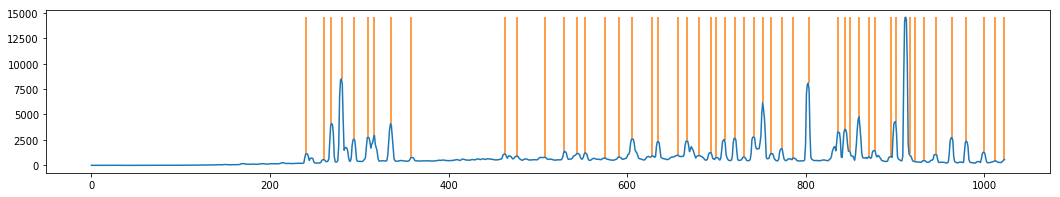

In [31]:
spectrum = np.median(fits.open('./examples/v_a_20190516_55_1_0_1.fits')[0].data[110:120], axis=0)
print(spectrum.shape)

resampled_flux = resample(spectrum-spectrum.min(), len(spectrum)*4)
peaks, _ = find_peaks(resampled_flux, prominence=150, distance=20, threshold=None)
peaks = peaks / 4.0

plt.figure(figsize=(18,3))
plt.plot(spectrum)
plt.vlines(peaks,
              spectrum[peaks.astype('int')],
              spectrum.max(),
              colors='C1')

In [35]:
c = Calibrator(peaks, elements=["Xe_strong"],
               min_wavelength=3400.,
               max_wavelength=8100.,
               range_tolerance=200)
c.set_fit_constraints(n_pix=len(spectrum))

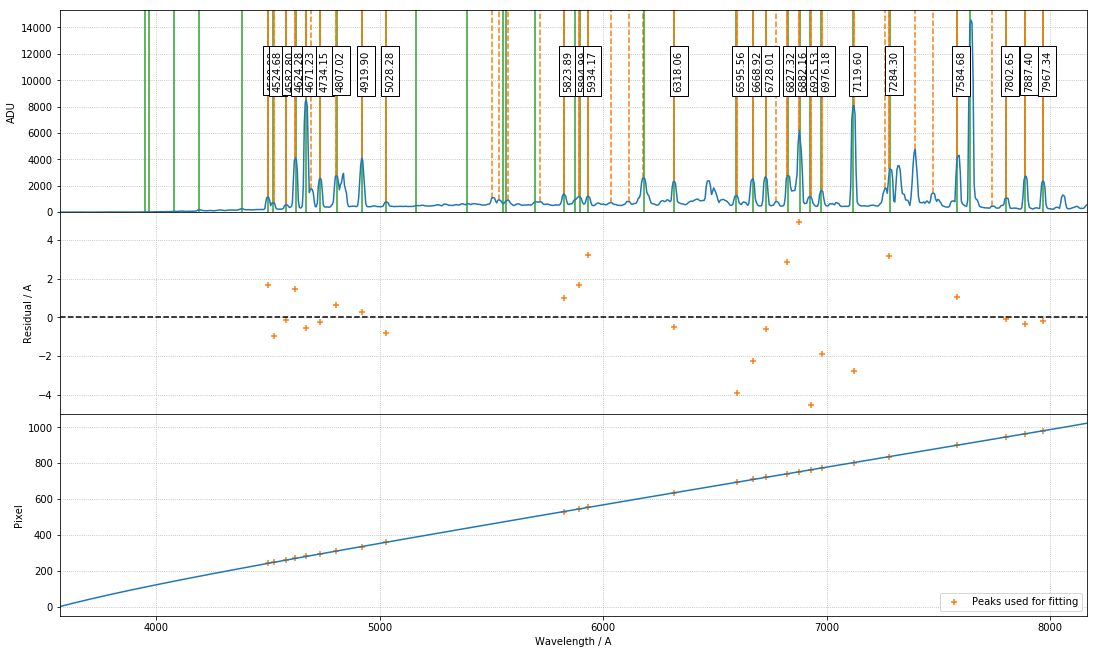

In [39]:
best_p = c.fit(max_tries=1000)
best_p, x_fit, y_fit = c.match_peaks_to_atlas(best_p, polydeg=5, tolerance=15)
c.plot_fit(spectrum, best_p, plot_atlas=True, log_spectrum=False)

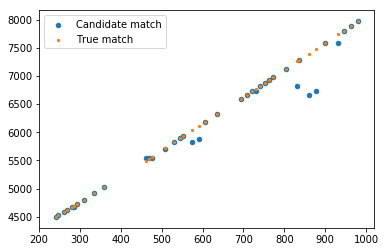

In [40]:
peaks, wavelengths, lamps = np.loadtxt("./examples/ground_truth_v_a.csv", delimiter=',', dtype='U').T

peaks = peaks.astype('float32')
wavelengths = wavelengths.astype('float32')

x, y = c._combine_linear_estimates(c.candidates)
plt.scatter(x, y, s=20, label="Candidate match")
plt.scatter(peaks, wavelengths, s=5, label="True match")
plt.legend()